In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Problem Statement 16: (Gap in number of beds)

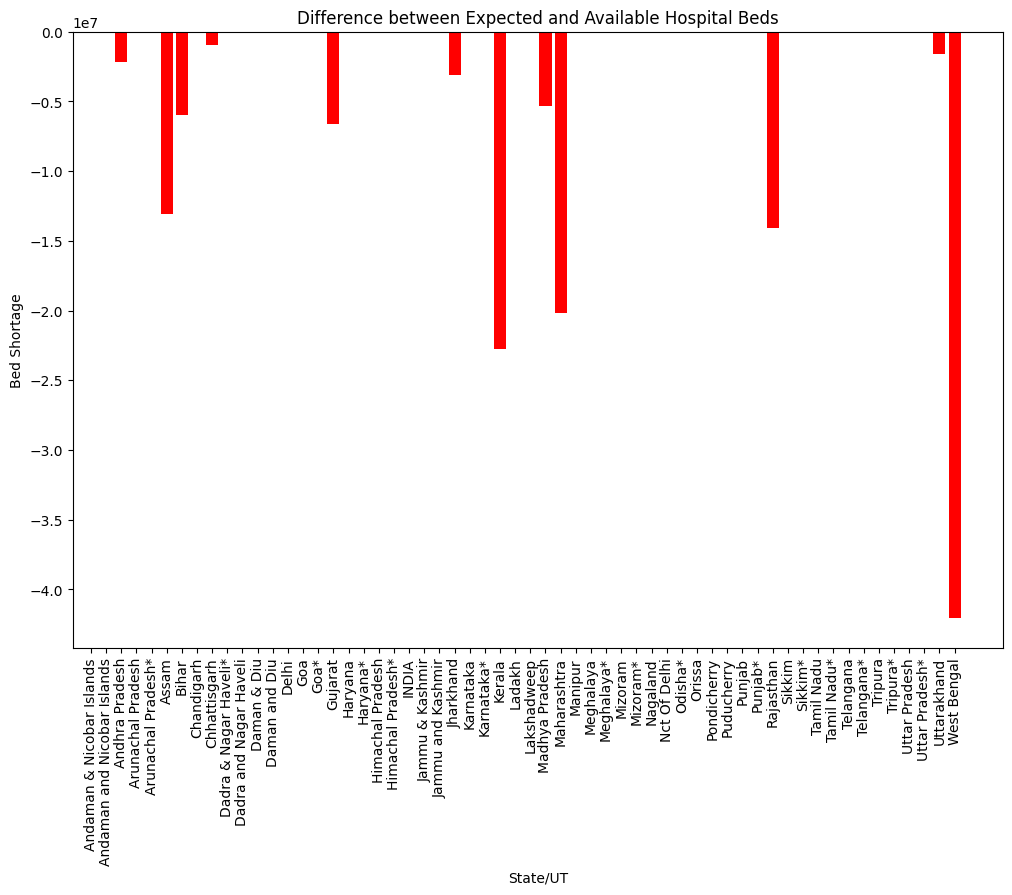

In [5]:
hospital_data = pd.read_csv("Clean Data\government_hospitals.csv")

# Load population data
population_data = pd.read_csv("Clean Data/census.csv")

# Calculate expected beds per State/UT
population_data['Total_Population'] = population_data['Male'] + population_data['Female']
population_data['Expected_Beds'] = population_data['Total_Population'] / 1000 * 3

# Calculate total available beds per State/UT
hospital_data['Total_Beds'] = hospital_data['Rural_Government_Hospitals'] * hospital_data['Rural_Government_Beds'] + \
                               hospital_data['Urban_Government_Hospitals'] * hospital_data['Urban_Government_Beds']

# Calculate the difference between expected and available beds
bed_shortage = population_data.groupby('State/UT')['Expected_Beds'].sum() - hospital_data.groupby('State/UT')['Total_Beds'].sum()

# Visualize the difference in number of beds
plt.figure(figsize=(12, 8))
plt.bar(bed_shortage.index, bed_shortage.values, color='red')
plt.xlabel('State/UT')
plt.ylabel('Bed Shortage')
plt.title('Difference between Expected and Available Hospital Beds')
plt.xticks(rotation=90)
plt.show()

In [13]:
hospital_data['Total_Beds'] = hospital_data['Rural_Government_Hospitals'] * hospital_data['Rural_Government_Beds'] + \
                               hospital_data['Urban_Government_Hospitals'] * hospital_data['Urban_Government_Beds']

total_population = population_data.groupby('State/UT')['Population'].sum()

required_beds = total_population / 1000 * 3

bed_gap = required_beds - hospital_data.groupby('State/UT')['Total_Beds'].sum()

avg_beds_per_hospital = hospital_data[['Rural_Government_Beds', 'Urban_Government_Beds']].mean().mean()

if bed_gap.isnull().any():
    bed_gap.fillna(0, inplace=True)

if np.isfinite(bed_gap).all():  # Check for NaN or infinite values
    # Check for non-finite values in the result of the division
    if not np.isfinite(avg_beds_per_hospital / bed_gap).all():
        print("Error: Non-finite values found in the result of the division. Handle them before converting to integer.")
    else:
        government_hospitals_required = (avg_beds_per_hospital / bed_gap).round().astype(int)

        plt.figure(figsize=(12, 8))
        government_hospitals_required.plot(kind='bar', color='blue')
        plt.xlabel('State/UT')
        plt.ylabel('Number of Government Hospitals Required')
        plt.title('Number of Government Hospitals Required to Meet WHO Standards')
        plt.xticks(rotation=90)
        plt.show()
else:
    print("Error: NaN or infinite values found in bed_gap. Handle them before converting to integer.")



Error: Non-finite values found in the result of the division. Handle them before converting to integer.
